# 서울시 구별 CCTV 현황 분석하기

### 작성 : [PinkWink](http://pinkwink.kr) 

* 서울시 각 구별 CCTV수를 파악하고, 인구대비 CCTV 비율을 파악해서 순위 비교
* 인구대비 CCTV의 평균치를 확인하고 그로부터 CCTV가 과하게 부족한 구를 확인
* Jupyter Notebook 사용환경을 익히고 Python 기본 문법을 확인
* Pandas와 Matplotlib의 기본적 사용법을 확인
* 단순한 그래프 표현에서 한 단계 더 나아가 경향을 확인하고 시각화하는 기초 확인

In [1]:
import pandas as pd

In [2]:
CCTV_Seoul = pd.read_csv('../data/01. CCTV_in_Seoul.csv',  encoding='utf-8')
CCTV_Seoul.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data/01. CCTV_in_Seoul.csv'

In [3]:
CCTV_Seoul.columns

Index(['기관명', '소계', '2013년도 이전', '2014년', '2015년', '2016년'], dtype='object')

In [4]:
CCTV_Seoul.columns[0]

'기관명'

In [12]:
CCTV_Seoul.rename(columns={CCTV_Seoul.columns[0] : '구별'}, inplace=True)
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


## 2-2. 엑셀파일 읽기 - 서울시 인구현황

In [171]:
pip install xlrd

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\bamxd\AppData\Local\Programs\Python\Python39\python.exe -m pip install --upgrade pip' command.


In [176]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls')
pop_Seoul.head()

,기간,자치구,세대,인구,인구.1,인구.2,인구.3,인구.4,인구.5,인구.6,인구.7,인구.8,세대당인구,65세이상고령자
0,기간,자치구,세대,합계,합계,합계,한국인,한국인,한국인,등록외국인,등록외국인,등록외국인,세대당인구,65세이상고령자
1,기간,자치구,세대,계,남자,여자,계,남자,여자,계,남자,여자,세대당인구,65세이상고령자
2,2017.1/4,합계,4202888,10197604,5000005,5197599,9926968,4871560,5055408,270636,128445,142191,2.36,1321458
3,2017.1/4,종로구,72654,162820,79675,83145,153589,75611,77978,9231,4064,5167,2.11,25425
4,2017.1/4,중구,59481,133240,65790,67450,124312,61656,62656,8928,4134,4794,2.09,20764


In [178]:
pop_Seoul = pd.read_excel('../data/01. population_in_Seoul.xls', 
                          header = 2,
                          usecols = 'B, D, G, J, N',
                          )
pop_Seoul.head()

,자치구,계,계.1,계.2,65세이상고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [179]:
pop_Seoul.rename(columns={pop_Seoul.columns[0] : '구별', 
                          pop_Seoul.columns[1] : '인구수', 
                          pop_Seoul.columns[2] : '한국인', 
                          pop_Seoul.columns[3] : '외국인', 
                          pop_Seoul.columns[4] : '고령자'}, inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


# 3. Pandas 기초

In [180]:
import pandas as pd
import numpy as np

In [181]:
s = pd.Series([1,3,5,np.nan,6,8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

In [182]:
dates = pd.date_range('20130101', periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [183]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, 
                  columns=['A','B','C','D'])
df

,A,B,C,D
2013-01-01,-0.692643,-0.096357,-0.373248,0.001205
2013-01-02,-1.224322,0.755610,1.896474,0.858470
2013-01-03,0.325110,0.356864,0.781804,3.736424
2013-01-04,-0.440852,1.157631,-1.105733,0.576522
2013-01-05,-0.096978,-0.675075,0.324302,-0.253183
2013-01-06,0.256821,-1.888332,-0.211726,-0.480287


In [18]:
df.head()

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353


In [19]:
df.head(3)

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177


In [20]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [21]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [22]:
df.values

array([[-0.35332924, -0.92746515,  1.25128067, -0.40417984],
       [-0.37095716, -0.65861485,  1.04079949,  0.38762048],
       [ 0.02361276, -0.85463513, -0.27500753,  1.05017664],
       [ 0.6260108 ,  0.45756025,  0.99594964, -0.66219643],
       [-1.4331182 , -0.06162579, -2.06521208, -0.48635338],
       [-1.06844701, -0.93904094,  1.14804648, -1.33557999]])

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2013-01-06
Freq: D
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       6 non-null      float64
 1   B       6 non-null      float64
 2   C       6 non-null      float64
 3   D       6 non-null      float64
dtypes: float64(4)
memory usage: 240.0 bytes


In [24]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.429371,-0.497304,0.349309,-0.241752
std,0.740830,0.571919,1.309009,0.839599
min,-1.433118,-0.939041,-2.065212,-1.335580
25%,-0.894075,-0.909258,0.042732,-0.618236
50%,-0.362143,-0.756625,1.018375,-0.445267
75%,-0.070623,-0.210873,1.121235,0.189670
max,0.626011,0.457560,1.251281,1.050177


In [25]:
df.sort_values(by='B', ascending=False)

,A,B,C,D
2013-01-04,0.626011,0.457560,0.995950,-0.662196
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-06,-1.068447,-0.939041,1.148046,-1.335580


In [26]:
df

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353
2013-01-06,-1.068447,-0.939041,1.148046,-1.335580


In [27]:
df['A']

2013-01-01   -0.353329
2013-01-02   -0.370957
2013-01-03    0.023613
2013-01-04    0.626011
2013-01-05   -1.433118
2013-01-06   -1.068447
Freq: D, Name: A, dtype: float64

In [28]:
df[0:3]

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177


In [29]:
df['20130102':'20130104']

,A,B,C,D
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196


In [30]:
df.loc[dates[0]]

A   -0.353329
B   -0.927465
C    1.251281
D   -0.404180
Name: 2013-01-01 00:00:00, dtype: float64

In [31]:
df.loc[:,['A','B']]

,A,B
2013-01-01,-0.353329,-0.927465
2013-01-02,-0.370957,-0.658615
2013-01-03,0.023613,-0.854635
2013-01-04,0.626011,0.457560
2013-01-05,-1.433118,-0.061626
2013-01-06,-1.068447,-0.939041


In [32]:
df.loc['20130102':'20130104',['A','B']]

,A,B
2013-01-02,-0.370957,-0.658615
2013-01-03,0.023613,-0.854635
2013-01-04,0.626011,0.457560


In [33]:
df.loc['20130102',['A','B']]

A   -0.370957
B   -0.658615
Name: 2013-01-02 00:00:00, dtype: float64

In [34]:
df.loc[dates[0],'A']

-0.35332923916260156

In [35]:
df.iloc[3]

A    0.626011
B    0.457560
C    0.995950
D   -0.662196
Name: 2013-01-04 00:00:00, dtype: float64

In [36]:
df.iloc[3:5,0:2]

,A,B
2013-01-04,0.626011,0.457560
2013-01-05,-1.433118,-0.061626


In [37]:
df.iloc[[1,2,4],[0,2]]

,A,C
2013-01-02,-0.370957,1.040799
2013-01-03,0.023613,-0.275008
2013-01-05,-1.433118,-2.065212


In [38]:
df.iloc[1:3,:]

,A,B,C,D
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177


In [39]:
df.iloc[:,1:3]

,B,C
2013-01-01,-0.927465,1.251281
2013-01-02,-0.658615,1.040799
2013-01-03,-0.854635,-0.275008
2013-01-04,0.457560,0.995950
2013-01-05,-0.061626,-2.065212
2013-01-06,-0.939041,1.148046


In [40]:
df

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353
2013-01-06,-1.068447,-0.939041,1.148046,-1.335580


In [41]:
df[df.A > 0]

,A,B,C,D
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196


In [42]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,NaN,1.251281,NaN
2013-01-02,NaN,NaN,1.040799,0.387620
2013-01-03,0.023613,NaN,NaN,1.050177
2013-01-04,0.626011,0.45756,0.995950,NaN
2013-01-05,NaN,NaN,NaN,NaN
2013-01-06,NaN,NaN,1.148046,NaN


In [44]:
df2 = df.copy()

In [45]:
df2['E'] = ['one', 'one','two','three','four','three']
df2

,A,B,C,D,E
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180,one
2013-01-02,-0.370957,-0.658615,1.040799,0.387620,one
2013-01-03,0.023613,-0.854635,-0.275008,1.050177,two
2013-01-04,0.626011,0.457560,0.995950,-0.662196,three
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353,four
2013-01-06,-1.068447,-0.939041,1.148046,-1.335580,three


In [46]:
df2['E'].isin(['two','four'])

2013-01-01    False
2013-01-02    False
2013-01-03     True
2013-01-04    False
2013-01-05     True
2013-01-06    False
Freq: D, Name: E, dtype: bool

In [47]:
df2[df2['E'].isin(['two','four'])]

,A,B,C,D,E
2013-01-03,0.023613,-0.854635,-0.275008,1.050177,two
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353,four


In [48]:
df

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.370957,-0.658615,1.040799,0.387620
2013-01-03,0.023613,-0.854635,-0.275008,1.050177
2013-01-04,0.626011,0.457560,0.995950,-0.662196
2013-01-05,-1.433118,-0.061626,-2.065212,-0.486353
2013-01-06,-1.068447,-0.939041,1.148046,-1.335580


In [49]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.353329,-0.927465,1.251281,-0.404180
2013-01-02,-0.724286,-1.586080,2.292080,-0.016559
2013-01-03,-0.700674,-2.440715,2.017073,1.033617
2013-01-04,-0.074663,-1.983155,3.013022,0.371421
2013-01-05,-1.507781,-2.044781,0.947810,-0.114933
2013-01-06,-2.576228,-2.983822,2.095857,-1.450513


In [50]:
df.apply(lambda x: x.max() - x.min())

A    2.059129
B    1.396601
C    3.316493
D    2.385757
dtype: float64

# 4. CCTV 데이터 파악하기

In [51]:
CCTV_Seoul.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
1,강동구,773,379,99,155,377
2,강북구,748,369,120,138,204
3,강서구,884,388,258,184,81
4,관악구,1496,846,260,390,613


In [52]:
CCTV_Seoul.sort_values(by='소계', ascending=True).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
9,도봉구,485,238,159,42,386
12,마포구,574,314,118,169,379
17,송파구,618,529,21,68,463
24,중랑구,660,509,121,177,109
23,중구,671,413,190,72,348


In [53]:
CCTV_Seoul.sort_values(by='소계', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년
0,강남구,2780,1292,430,584,932
18,양천구,2034,1843,142,30,467
14,서초구,1930,1406,157,336,398
21,은평구,1873,1138,224,278,468
20,용산구,1624,1368,218,112,398


In [56]:
CCTV_Seoul['최근증가율'] = (CCTV_Seoul['2016년'] + CCTV_Seoul['2015년'] + \
                        CCTV_Seoul['2014년']) / CCTV_Seoul['2013년도 이전']  * 100
CCTV_Seoul.sort_values(by='최근증가율', ascending=False).head(5)

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율
22,종로구,1002,464,314,211,630,248.922414
9,도봉구,485,238,159,42,386,246.638655
12,마포구,574,314,118,169,379,212.101911
8,노원구,1265,542,57,451,516,188.929889
1,강동구,773,379,99,155,377,166.490765


# 5. 서울시 인구 데이터 파악하기

In [184]:
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
0,합계,10197604.0,9926968.0,270636.0,1321458.0
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0


In [185]:
pop_Seoul.drop([0], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [186]:
pop_Seoul['구별'].unique()

array(['종로구', '중구', '용산구', '성동구', '광진구', '동대문구', '중랑구', '성북구', '강북구',
       '도봉구', '노원구', '은평구', '서대문구', '마포구', '양천구', '강서구', '구로구', '금천구',
       '영등포구', '동작구', '관악구', '서초구', '강남구', '송파구', '강동구', nan],
      dtype=object)

In [187]:
pop_Seoul[pop_Seoul['구별'].isnull()]

,구별,인구수,한국인,외국인,고령자
26,NaN,NaN,NaN,NaN,NaN


In [188]:
pop_Seoul.drop([26], inplace=True)
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자
1,종로구,162820.0,153589.0,9231.0,25425.0
2,중구,133240.0,124312.0,8928.0,20764.0
3,용산구,244203.0,229456.0,14747.0,36231.0
4,성동구,311244.0,303380.0,7864.0,39997.0
5,광진구,372164.0,357211.0,14953.0,42214.0


In [189]:
pop_Seoul['외국인비율'] = pop_Seoul['외국인'] / pop_Seoul['인구수'] * 100
pop_Seoul['고령자비율'] = pop_Seoul['고령자'] / pop_Seoul['인구수'] * 100
pop_Seoul.head()

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
4,성동구,311244.0,303380.0,7864.0,39997.0,2.526635,12.850689
5,광진구,372164.0,357211.0,14953.0,42214.0,4.017852,11.342849


In [190]:
pop_Seoul.sort_values(by='인구수', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
23,강남구,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [191]:
pop_Seoul.sort_values(by='외국인', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291
6,동대문구,369496.0,354079.0,15417.0,54173.0,4.172440,14.661322


In [192]:
pop_Seoul.sort_values(by='외국인비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
19,영등포구,402985.0,368072.0,34913.0,52413.0,8.663598,13.006191
18,금천구,255082.0,236353.0,18729.0,32970.0,7.342345,12.925255
17,구로구,447874.0,416487.0,31387.0,56833.0,7.007998,12.689506
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [193]:
pop_Seoul.sort_values(by='고령자', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
16,강서구,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
24,송파구,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
12,은평구,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
11,노원구,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
21,관악구,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [194]:
pop_Seoul.sort_values(by='고령자비율', ascending=False).head(5)

,구별,인구수,한국인,외국인,고령자,외국인비율,고령자비율
9,강북구,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
1,종로구,162820.0,153589.0,9231.0,25425.0,5.669451,15.615404
2,중구,133240.0,124312.0,8928.0,20764.0,6.700690,15.583909
3,용산구,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427
13,서대문구,327163.0,314982.0,12181.0,48161.0,3.723221,14.720797


# 6. Pandas 고급 두 DataFrame 병합하기

In [195]:
df1 = pd.DataFrame({'A': ['A0', 'A1', 'A2', 'A3'], 
                    'B': ['B0', 'B1', 'B2', 'B3'],
                    'C': ['C0', 'C1', 'C2', 'C3'],
                    'D': ['D0', 'D1', 'D2', 'D3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['A4', 'A5', 'A6', 'A7'],
                    'B': ['B4', 'B5', 'B6', 'B7'],
                    'C': ['C4', 'C5', 'C6', 'C7'],
                    'D': ['D4', 'D5', 'D6', 'D7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['A8', 'A9', 'A10', 'A11'],
                    'B': ['B8', 'B9', 'B10', 'B11'],
                    'C': ['C8', 'C9', 'C10', 'C11'],
                    'D': ['D8', 'D9', 'D10', 'D11']},
                   index=[8, 9, 10, 11])

In [196]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [197]:
df2

,A,B,C,D
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7


In [198]:
df3

,A,B,C,D
8,A8,B8,C8,D8
9,A9,B9,C9,D9
10,A10,B10,C10,D10
11,A11,B11,C11,D11


In [199]:
result = pd.concat([df1, df2, df3])
result

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3
4,A4,B4,C4,D4
5,A5,B5,C5,D5
6,A6,B6,C6,D6
7,A7,B7,C7,D7
8,A8,B8,C8,D8
9,A9,B9,C9,D9


In [200]:
result = pd.concat([df1, df2, df3], keys=['x', 'y', 'z'])
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [201]:
result.index

MultiIndex([('x',  0),
            ('x',  1),
            ('x',  2),
            ('x',  3),
            ('y',  4),
            ('y',  5),
            ('y',  6),
            ('y',  7),
            ('z',  8),
            ('z',  9),
            ('z', 10),
            ('z', 11)],
           )

In [202]:
result.index.get_level_values(0)

Index(['x', 'x', 'x', 'x', 'y', 'y', 'y', 'y', 'z', 'z', 'z', 'z'], dtype='object')

In [203]:
result.index.get_level_values(1)

Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11], dtype='int64')

In [204]:
result

A    B    C    D
x 0    A0   B0   C0   D0
  1    A1   B1   C1   D1
  2    A2   B2   C2   D2
  3    A3   B3   C3   D3
y 4    A4   B4   C4   D4
  5    A5   B5   C5   D5
  6    A6   B6   C6   D6
  7    A7   B7   C7   D7
z 8    A8   B8   C8   D8
  9    A9   B9   C9   D9
  10  A10  B10  C10  D10
  11  A11  B11  C11  D11

In [205]:
df4 = pd.DataFrame({'B': ['B2', 'B3', 'B6', 'B7'], 
                    'D': ['D2', 'D3', 'D6', 'D7'],
                    'F': ['F2', 'F3', 'F6', 'F7']},
                   index=[2, 3, 6, 7])

result = pd.concat([df1, df4], axis=1)

In [206]:
df1

,A,B,C,D
0,A0,B0,C0,D0
1,A1,B1,C1,D1
2,A2,B2,C2,D2
3,A3,B3,C3,D3


In [207]:
df4

,B,D,F
2,B2,D2,F2
3,B3,D3,F3
6,B6,D6,F6
7,B7,D7,F7


In [208]:
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3
6,NaN,NaN,NaN,NaN,B6,D6,F6
7,NaN,NaN,NaN,NaN,B7,D7,F7


In [209]:
result = pd.concat([df1, df4], axis=1, join='inner')
result

,A,B,C,D,B,D,F
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [210]:
#  join_axes는 더이상 지원하지 않음.
result = pd.concat([df1, df4], axis=1).reindex(df1.index)
result

,A,B,C,D,B,D,F
0,A0,B0,C0,D0,NaN,NaN,NaN
1,A1,B1,C1,D1,NaN,NaN,NaN
2,A2,B2,C2,D2,B2,D2,F2
3,A3,B3,C3,D3,B3,D3,F3


In [211]:
result = pd.concat([df1, df4], ignore_index=True)
result

,A,B,C,D,F
0,A0,B0,C0,D0,NaN
1,A1,B1,C1,D1,NaN
2,A2,B2,C2,D2,NaN
3,A3,B3,C3,D3,NaN
4,NaN,B2,NaN,D2,F2
5,NaN,B3,NaN,D3,F3
6,NaN,B6,NaN,D6,F6
7,NaN,B7,NaN,D7,F7


In [212]:
left = pd.DataFrame({'key': ['K0', 'K4', 'K2', 'K3'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'key': ['K0', 'K1', 'K2', 'K3'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})

In [213]:
left

,key,A,B
0,K0,A0,B0
1,K4,A1,B1
2,K2,A2,B2
3,K3,A3,B3


In [214]:
right

,key,C,D
0,K0,C0,D0
1,K1,C1,D1
2,K2,C2,D2
3,K3,C3,D3


In [215]:
pd.merge(left, right, on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


In [216]:
pd.merge(left, right, how='left', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [217]:
pd.merge(left, right, how='right', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K1,NaN,NaN,C1,D1
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3


In [218]:
pd.merge(left, right, how='outer', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K4,A1,B1,NaN,NaN
2,K2,A2,B2,C2,D2
3,K3,A3,B3,C3,D3
4,K1,NaN,NaN,C1,D1


In [219]:
pd.merge(left, right, how='inner', on='key')

,key,A,B,C,D
0,K0,A0,B0,C0,D0
1,K2,A2,B2,C2,D2
2,K3,A3,B3,C3,D3


# 7. CCTV 데이터와 인구 데이터 합치고 분석하기

In [220]:
data_result = pd.merge(CCTV_Seoul, pop_Seoul, on='구별')
data_result.head()

,구별,소계,2013년도 이전,2014년,2015년,2016년,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,1292,430,584,932,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,379,99,155,377,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,369,120,138,204,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,388,258,184,81,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,846,260,390,613,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [221]:
del data_result['2013년도 이전']
del data_result['2014년']
del data_result['2015년']
del data_result['2016년']
data_result.head()

,구별,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
0,강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
1,강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
2,강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
3,강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
4,관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [222]:
data_result.set_index('구별', inplace=True)
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


In [223]:
np.corrcoef(data_result['고령자비율'],data_result['소계'])

array([[ 1.        , -0.28078554],
       [-0.28078554,  1.        ]])

In [224]:
np.corrcoef(data_result['외국인비율'],data_result['소계'])

array([[ 1.        , -0.13607433],
       [-0.13607433,  1.        ]])

In [225]:
np.corrcoef(data_result['인구수'],data_result['소계'])

array([[1.        , 0.30634228],
       [0.30634228, 1.        ]])

In [226]:
data_result.sort_values(by='소계', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308
은평구,1873,85.237258,494388.0,489943.0,4445.0,72334.0,0.899091,14.631019
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427


In [227]:
data_result.sort_values(by='인구수', ascending=False).head(5)

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
노원구,1265,188.929889,569384.0,565565.0,3819.0,71941.0,0.670725,12.634883
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


# 8. 그래프 그리기 기초 - matplotlib

In [228]:
import matplotlib.pyplot as plt
%matplotlib inline

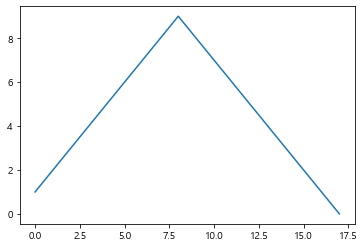

In [229]:
plt.figure()
plt.plot([1,2,3,4,5,6,7,8,9,8,7,6,5,4,3,2,1,0])
plt.show()

In [230]:
import numpy as np

t = np.arange(0,12,0.01)

y = np.sin(t)

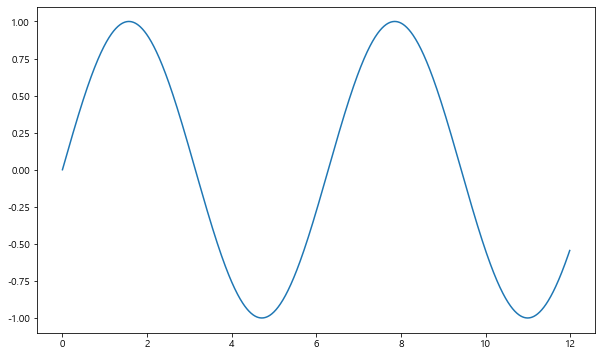

In [231]:
plt.figure(figsize=(10,6)) 
plt.plot(t, y)
plt.show()

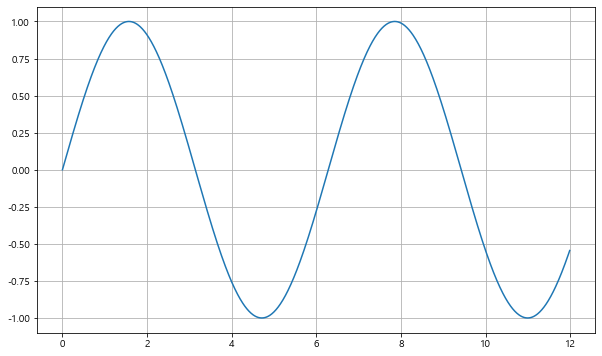

In [232]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid() # 그리드 적용하기
plt.show()

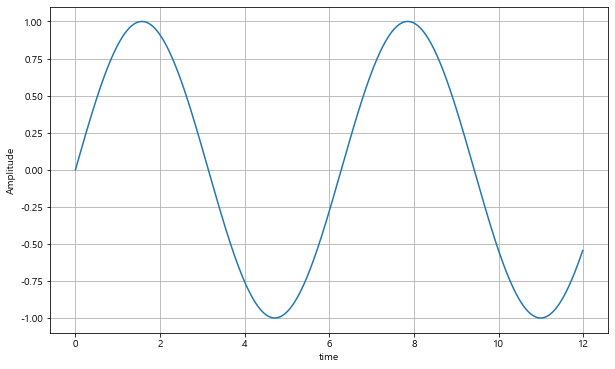

In [233]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')       # x축 라벨 적용하기
plt.ylabel('Amplitude')  # y축 라벨 적용하기
plt.show()

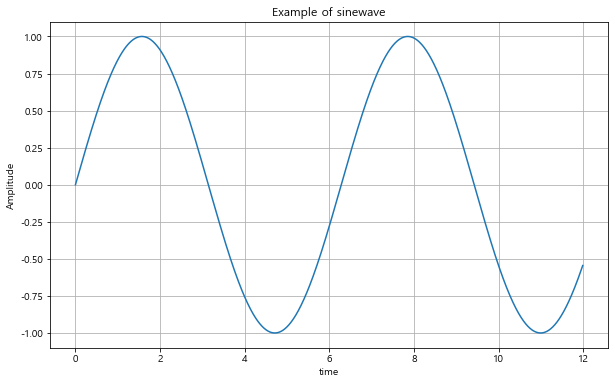

In [234]:
plt.figure(figsize=(10,6))
plt.plot(t, y)
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

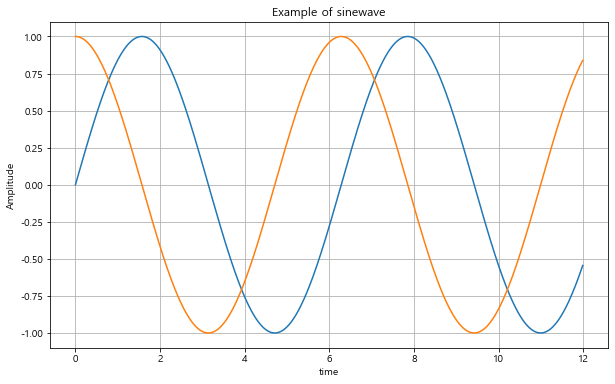

In [235]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t))
plt.plot(t, np.cos(t))
plt.grid()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

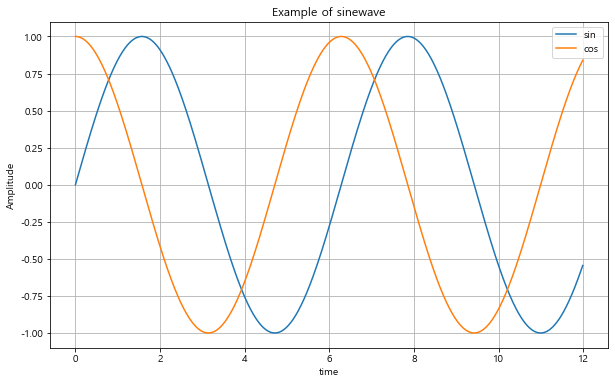

In [236]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), label='sin')
plt.plot(t, np.cos(t), label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

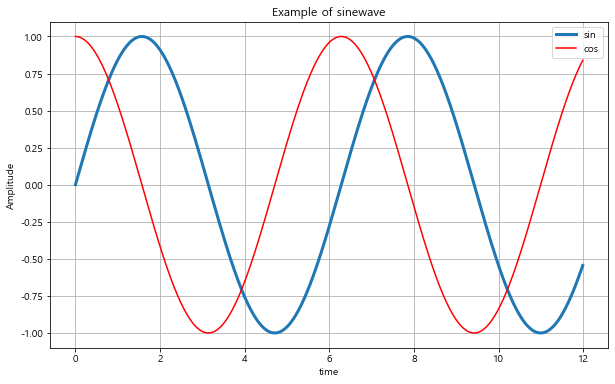

In [237]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.show()

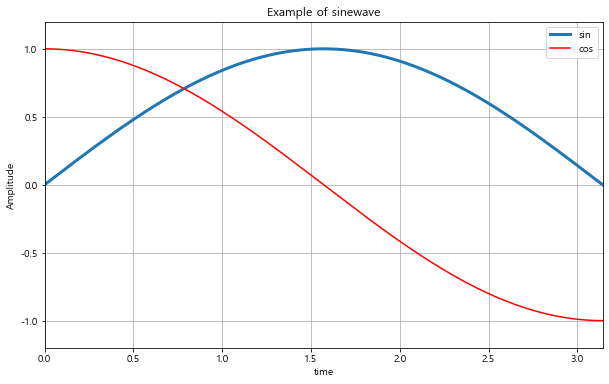

In [238]:
plt.figure(figsize=(10,6))
plt.plot(t, np.sin(t), lw=3, label='sin')
plt.plot(t, np.cos(t), 'r', label='cos')
plt.grid()
plt.legend()
plt.xlabel('time')
plt.ylabel('Amplitude')
plt.title('Example of sinewave')
plt.ylim(-1.2, 1.2)
plt.xlim(0, np.pi)
plt.show()

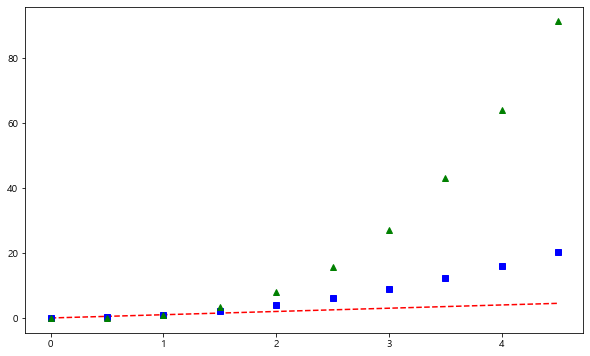

In [239]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
plt.plot(t, t, 'r--')
plt.plot(t, t**2, 'bs')
plt.plot(t, t**3, 'g^')
plt.show()

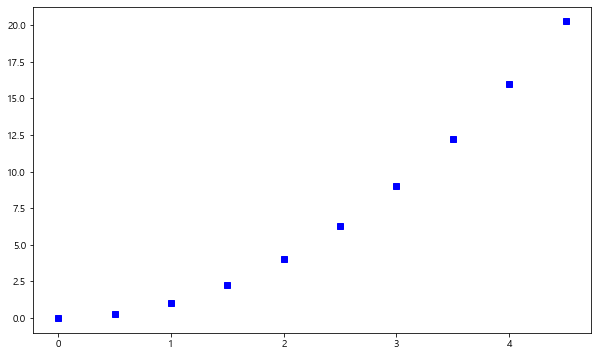

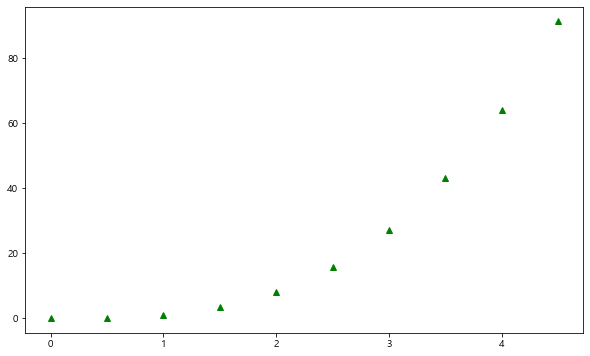

In [240]:
t = np.arange(0, 5, 0.5)

plt.figure(figsize=(10,6))
pl1 = plt.plot(t, t**2, 'bs')

plt.figure(figsize=(10,6))
pl2 = plt.plot(t, t**3, 'g^')

plt.show()

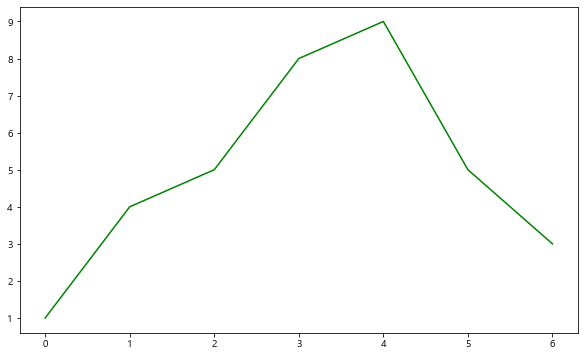

In [241]:
t = [0, 1, 2, 3, 4, 5, 6] 
y = [1, 4, 5, 8, 9, 5, 3]

plt.figure(figsize=(10,6))
plt.plot(t, y, color='green')
plt.show()

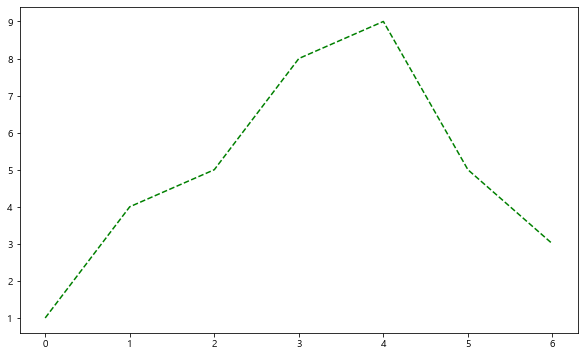

In [242]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed')
plt.show()

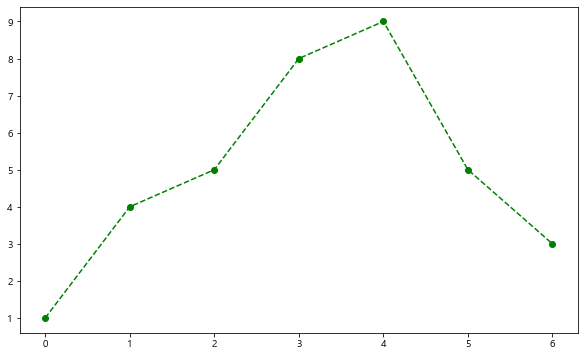

In [243]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o')
plt.show()

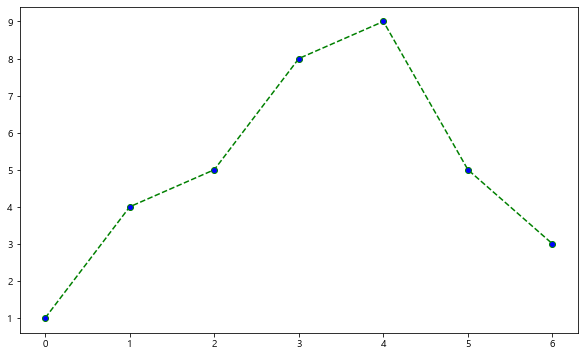

In [244]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue')
plt.show()

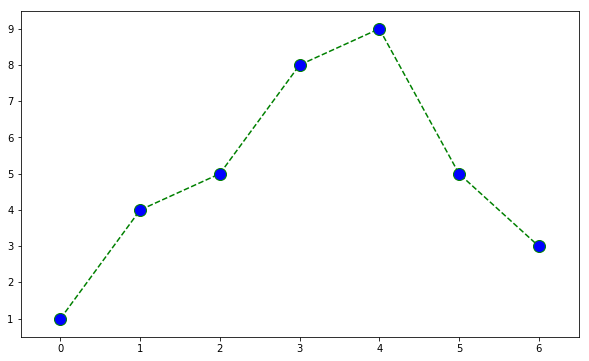

In [112]:
plt.figure(figsize=(10,6))
plt.plot(t, y, color='green', linestyle='dashed', marker='o',
        markerfacecolor = 'blue', markersize=12)

plt.xlim([-0.5, 6.5])
plt.ylim([0.5, 9.5])
plt.show()

In [245]:
t = np.array([0,1,2,3,4,5,6,7,8,9])
y = np.array([9,8,7,9,8,3,2,4,3,4])

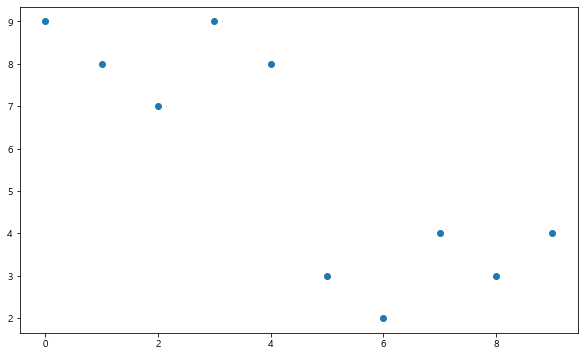

In [246]:
plt.figure(figsize=(10,6))
plt.scatter(t,y)
plt.show()

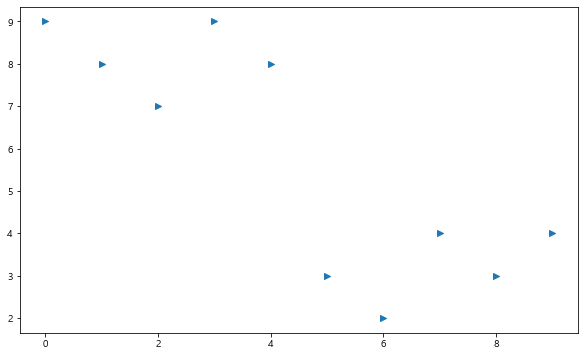

In [247]:
plt.figure(figsize=(10,6))
plt.scatter(t,y, marker='>')
plt.show()

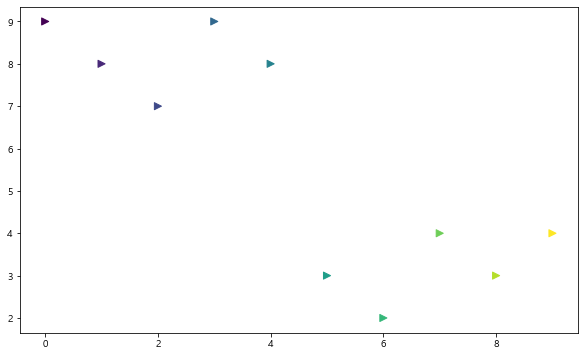

In [248]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.show()

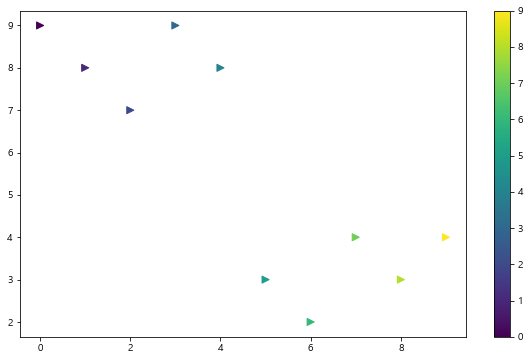

In [249]:
colormap = t

plt.figure(figsize=(10,6))
plt.scatter(t,y, s = 50, c = colormap, marker='>')
plt.colorbar()
plt.show()

In [250]:
s1 = np.random.normal(loc=0, scale=1, size=1000)
s2 = np.random.normal(loc=5, scale=0.5, size=1000)
s3 = np.random.normal(loc=10, scale=2, size=1000)

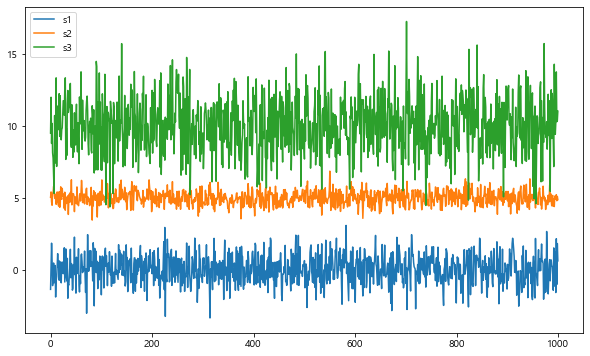

In [251]:
plt.figure(figsize=(10,6))
plt.plot(s1, label='s1')
plt.plot(s2, label='s2')
plt.plot(s3, label='s3')
plt.legend()
plt.show()

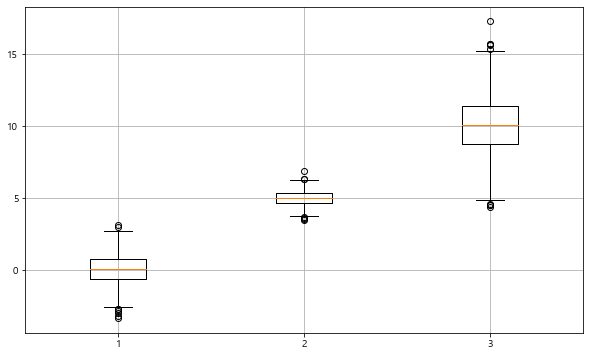

In [252]:
plt.figure(figsize=(10,6))
plt.boxplot((s1, s2, s3))
plt.grid()
plt.show()

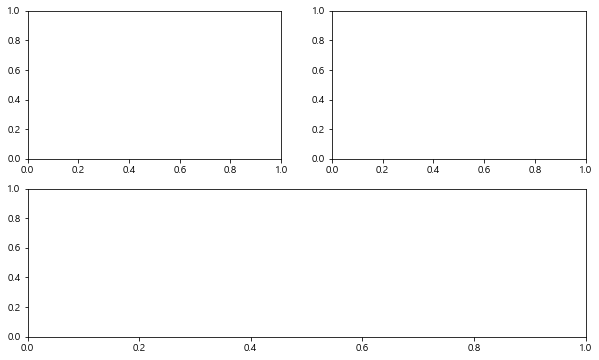

In [253]:
plt.figure(figsize=(10,6))

plt.subplot(221)
plt.subplot(222)
plt.subplot(212)

plt.show()

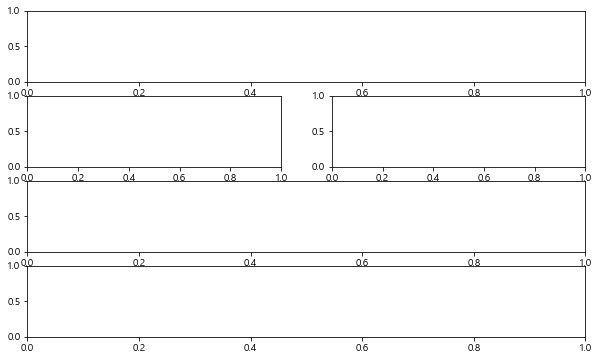

In [254]:
plt.figure(figsize=(10,6))

plt.subplot(411)
plt.subplot(423)
plt.subplot(424)
plt.subplot(413)
plt.subplot(414)

plt.show()

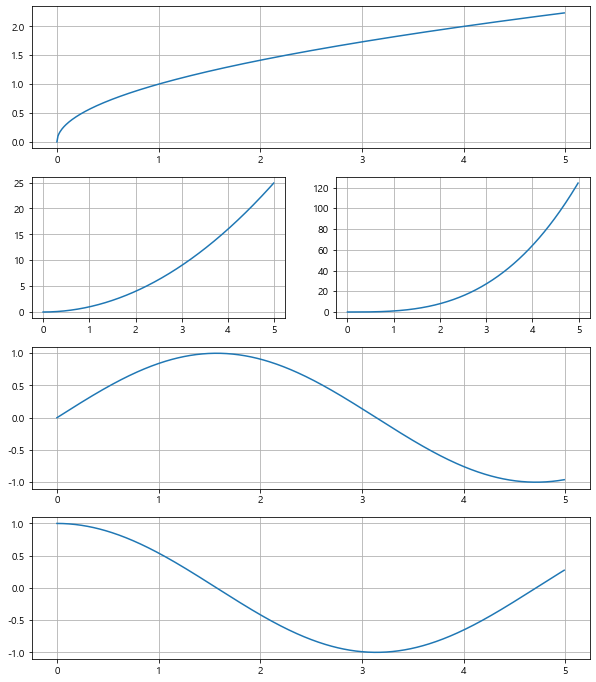

In [255]:
t = np.arange(0,5,0.01)

plt.figure(figsize=(10,12))

plt.subplot(411)
plt.plot(t,np.sqrt(t))
plt.grid()

plt.subplot(423)
plt.plot(t,t**2)
plt.grid()

plt.subplot(424)
plt.plot(t,t**3)
plt.grid()

plt.subplot(413)
plt.plot(t,np.sin(t))
plt.grid()

plt.subplot(414)
plt.plot(t,np.cos(t))
plt.grid()

plt.show()

# 9. CCTV와 인구현황 그래프로 분석하기

In [256]:
import platform

from matplotlib import font_manager, rc
plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

In [257]:
data_result.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율
구별,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217
강동구,773,166.490765,453233.0,449019.0,4214.0,54622.0,0.929765,12.051638
강북구,748,125.203252,330192.0,326686.0,3506.0,54813.0,1.061806,16.600342
강서구,884,134.793814,603772.0,597248.0,6524.0,72548.0,1.080540,12.015794
관악구,1496,149.290780,525515.0,507203.0,18312.0,68082.0,3.484582,12.955291


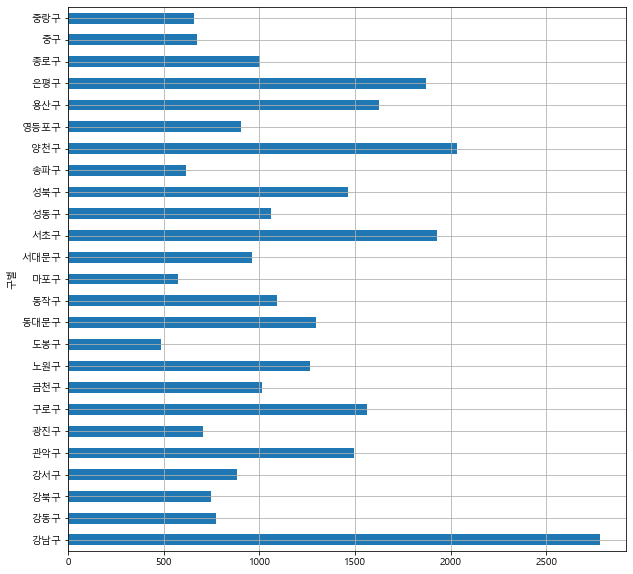

In [258]:
plt.figure()
data_result['소계'].plot(kind='barh', grid=True, figsize=(10,10))
plt.show()

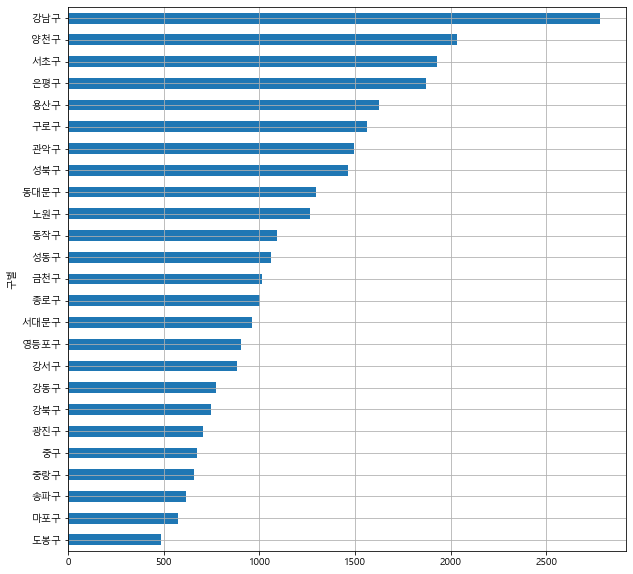

In [259]:
data_result['소계'].sort_values().plot(kind='barh', 
                                     grid=True, figsize=(10,10))
plt.show()

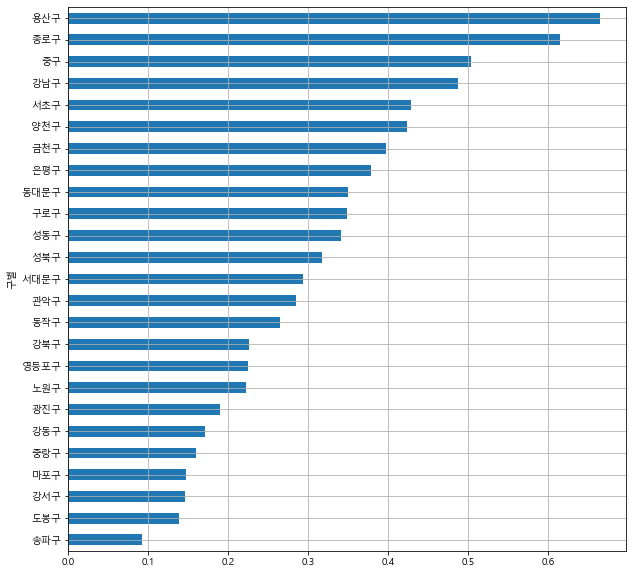

In [260]:
data_result['CCTV비율'] = data_result['소계'] / data_result['인구수'] * 100

data_result['CCTV비율'].sort_values().plot(kind='barh', 
                                         grid=True, figsize=(10,10))
plt.show()

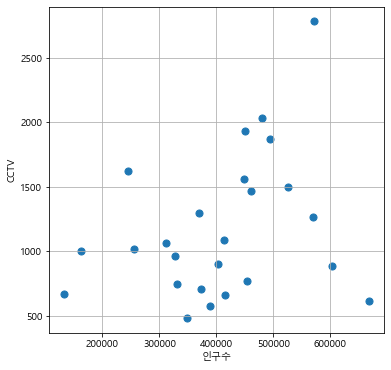

In [261]:
plt.figure(figsize=(6,6))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

In [262]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)
fp1

array([1.30916415e-03, 6.45066497e+02])

In [263]:
f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

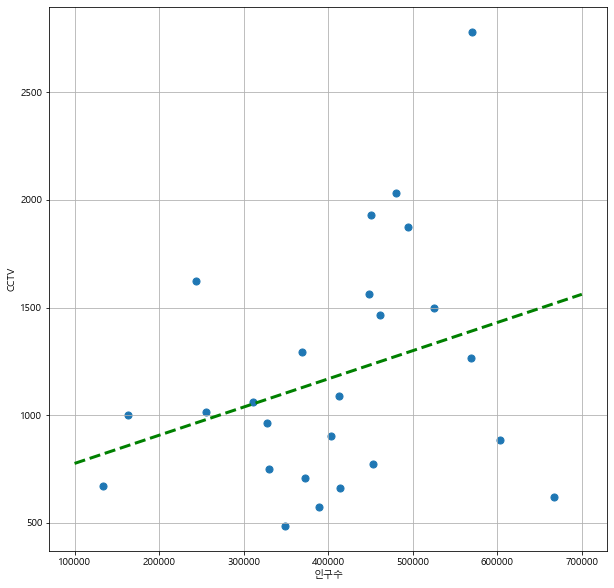

In [264]:
plt.figure(figsize=(10,10))
plt.scatter(data_result['인구수'], data_result['소계'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')
plt.xlabel('인구수')
plt.ylabel('CCTV')
plt.grid()
plt.show()

# 10. 조금더 설득력 있는 자료 만들기

In [265]:
fp1 = np.polyfit(data_result['인구수'], data_result['소계'], 1)

f1 = np.poly1d(fp1)
fx = np.linspace(100000, 700000, 100)

data_result['오차'] = np.abs(data_result['소계'] - f1(data_result['인구수']))

df_sort = data_result.sort_values(by='오차', ascending=False)
df_sort.head()

,소계,최근증가율,인구수,한국인,외국인,고령자,외국인비율,고령자비율,CCTV비율,오차
구별,,,,,,,,,,
강남구,2780,150.619195,570500.0,565550.0,4950.0,63167.0,0.867660,11.072217,0.487292,1388.055355
송파구,618,104.347826,667483.0,660584.0,6899.0,72506.0,1.033584,10.862599,0.092587,900.911312
양천구,2034,34.671731,479978.0,475949.0,4029.0,52975.0,0.839413,11.036964,0.423769,760.563512
서초구,1930,63.371266,450310.0,445994.0,4316.0,51733.0,0.958451,11.488308,0.428594,695.403794
용산구,1624,53.216374,244203.0,229456.0,14747.0,36231.0,6.038828,14.836427,0.665020,659.231690


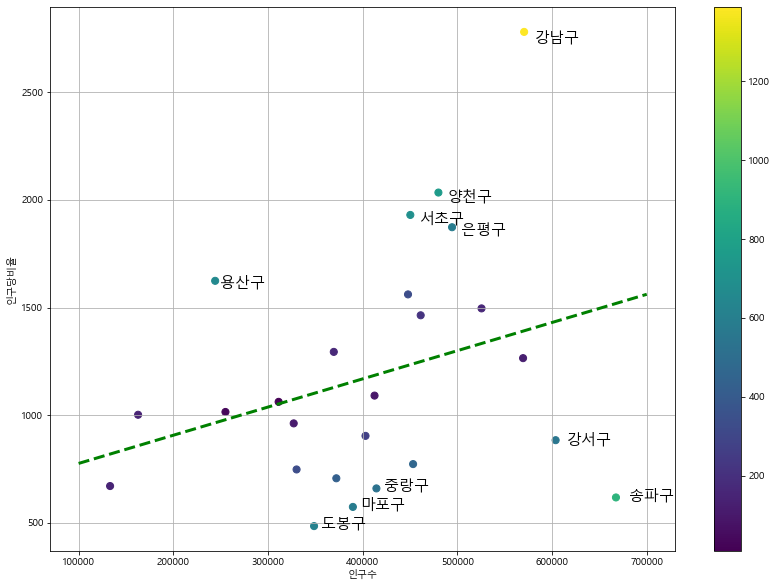

In [266]:
plt.figure(figsize=(14,10))
plt.scatter(data_result['인구수'], data_result['소계'], 
            c=data_result['오차'], s=50)
plt.plot(fx, f1(fx), ls='dashed', lw=3, color='g')

for n in range(10):
    plt.text(df_sort['인구수'][n]*1.02, df_sort['소계'][n]*0.98, 
             df_sort.index[n], fontsize=15)
    
plt.xlabel('인구수')
plt.ylabel('인구당비율')
plt.colorbar()
plt.grid()
plt.show()

* 서울시에서 다른 구와 비교했을 때, 강남구, 양천구, 서초구, 은평구는 CCTV가 많지만,
* 송파구, 강서구, 도봉구, 마포구는 다른 구에 비해 CCTV 비율이 낮다